<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/07_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

# 런타임 유형 GPU로 변경

#손실 곡선

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train/255.0
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_scaled.shape

(48000, 28, 28)

In [5]:
def model_fn(a_layer=None):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28,28), name='input'))
  model.add(keras.layers.Dense(100, activation='relu', name='hidden_1'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax', name='output'))
  return model

### 가변형 매개변수 복습

In [6]:
def unpacking(a,b,*c):
  print(f"a:{a}, b:{b}, c:{c}")

In [7]:
unpacking(1,2,3,4,5) # packing 기능 수행

a:1, b:2, c:(3, 4, 5)


In [8]:
def unpacking2(a,b,c):
  print(f"a:{a}, b:{b}, c:{c}")

In [9]:
#unpacking2(1,2,3,4,5) #오류!!!

In [10]:
def fn(a, b, *args, **kwargs):
  print("==고정형 매개변수==")
  print(f"a:{a}, b:{b}")
  print("\n==가변형 매개변수==")
  for i, arg in enumerate(args):
    print(f"args[{i}]={arg}")
  print("\n==키워드 매개변수==")
  for k, v in kwargs.items(): # 딕셔너리
    print(f"{k}={v}")

In [11]:
fn(1,2, 3, 4, 5, x=3, y=4, z=5)

==고정형 매개변수==
a:1, b:2

==가변형 매개변수==
args[0]=3
args[1]=4
args[2]=5

==키워드 매개변수==
x=3
y=4
z=5


### 위의 코드를 가변형으로 바꿔보자

In [12]:
# 유연하게 레이어들을 추가할 수 있다!
def model_fn2(*layers):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28,28), name='input'))
  model.add(keras.layers.Dense(100, activation='relu', name='hidden_1'))
  for layer in layers:
    model.add(layer)
  model.add(keras.layers.Dense(10, activation='softmax', name='output'))
  return model

In [13]:
# model = model_fn2(keras.layers.Dense(80, activation='relu', name='hidden_2'),
#                   keras.layers.Dense(60, activation='relu', name='hidden_3')) #추가
model = model_fn2()

In [14]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#검증손실

In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

#RMSprop 

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

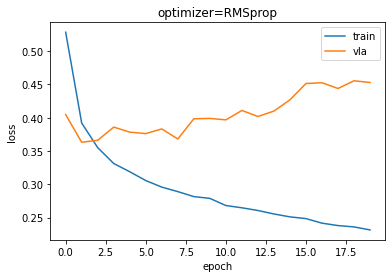

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimizer=RMSprop')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()

In [18]:
#Adam 은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조절한다 -> 과대적합을 줄일 수 있다

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

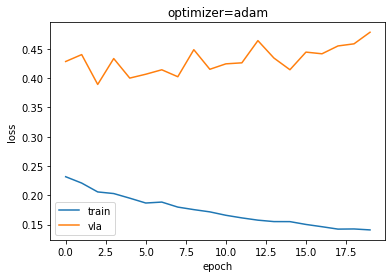

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimizer=adam')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()

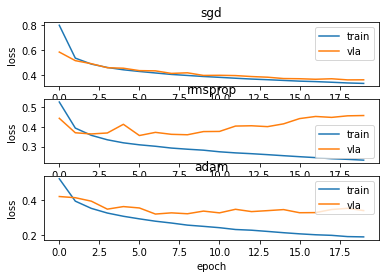

In [21]:
fig, axes = plt.subplots(3,1)
for i, opt in enumerate(['sgd','rmsprop','adam']):
  model = model_fn2()
  model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

  axes[i].plot(history.history['loss'])
  axes[i].plot(history.history['val_loss'])
  axes[i].set_title(opt)
  axes[i].set_xlabel('epoch')
  axes[i].set_ylabel('loss')
  axes[i].legend(['train','vla'])

In [22]:
optimizers = ['sgd','rmsprop','adam']
models, histories = [], []
for i, opt in enumerate(optimizers):
  models.append(model_fn2())
  models[i].compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  histories.append(models[i].fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val)))

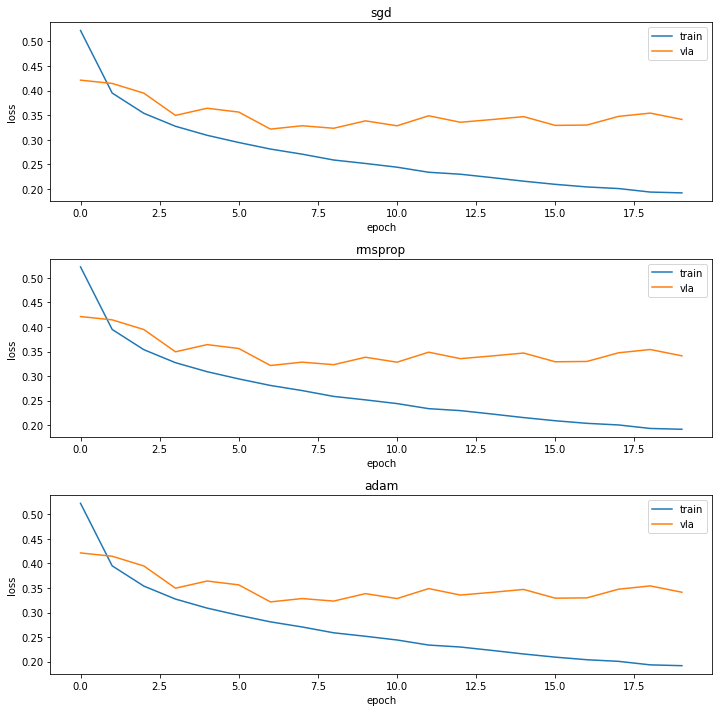

In [23]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
for i, opt in enumerate(['sgd','rmsprop','adam']):
  axes[i].plot(history.history['loss'])
  axes[i].plot(history.history['val_loss'])
  axes[i].set_title(opt)
  axes[i].set_xlabel('epoch')
  axes[i].set_ylabel('loss')
  axes[i].legend(['train','vla'])
fig.tight_layout()
plt.show()

# 드롭아웃
훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(=뉴런의 출력을 0으로 만들어) 과대적합을 막는다.

In [24]:
model.summary() # 현재 상태

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = model_fn2(keras.layers.Dropout(0.3)) # 30%를 랜덤하게 꺼서 overfit 낮추기, 일반화 높이기
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


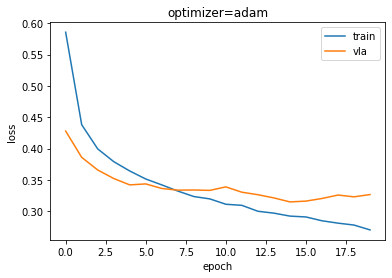

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimizer=adam')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()

# 위의 그래프보다 낮아진 것을 알 수 있다

In [37]:
models, histories = [], []
rates = np.arange(0.0, 0.5, 0.1)
for rate in rates:
  model = model_fn2(keras.layers.Dropout(rate))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))
  models.append(model)
  histories.append(history)

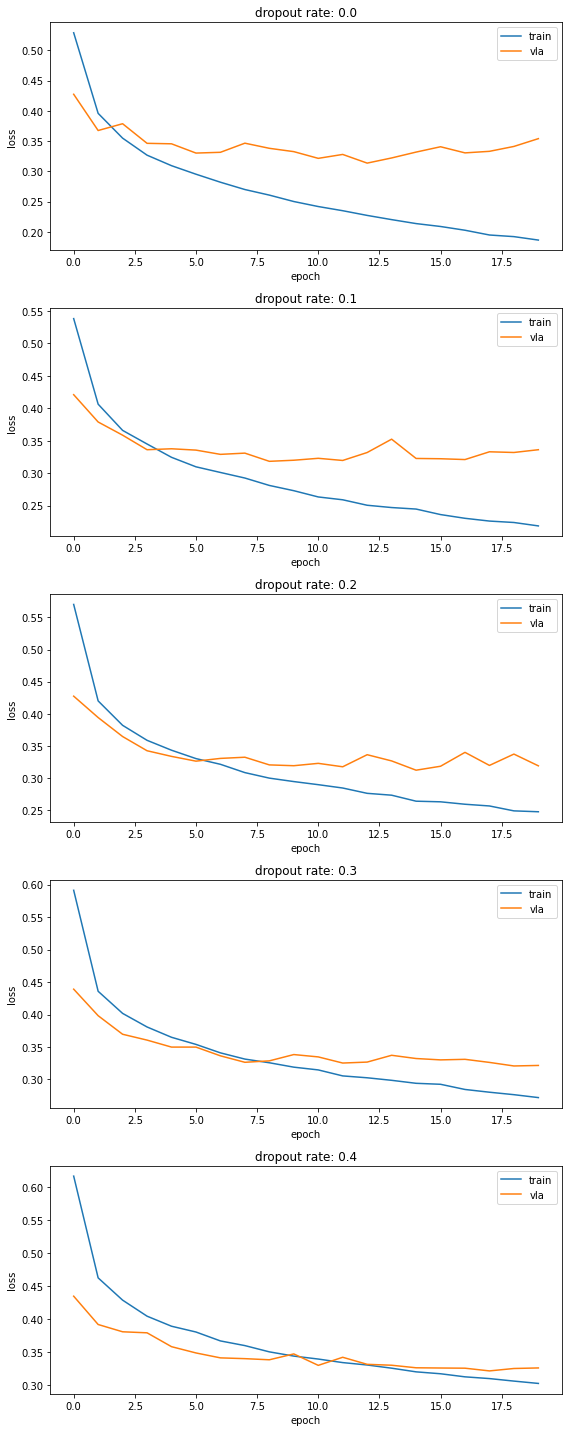

In [41]:
fig, axes = plt.subplots(rates.size, 1, figsize=(8,20))
for i, ax in enumerate(axes):
  ax.plot(histories[i].history['loss'])
  ax.plot(histories[i].history['val_loss'])
  ax.set_title(f"dropout rate: {rates[i]:.1f}")
  ax.set_xlabel('epoch')
  ax.set_ylabel('loss')
  ax.legend(['train','vla'])
fig.tight_layout()
plt.show()

#모델 저장과 복원
나중에 참조해서 쓰기 위해 담아둬야 함  
메모리에 저장하는게 아니라 파일로 저장하고 싶다면?! -> USB에 저장 등

In [49]:
model.layers

In [50]:
# dropout
model.layers[2]

In [51]:
#?keras.layers.Dropout

In [42]:
model.save_weights('model-weights.h5') # 학습된 파라미터를 저장 - load_weights와 한 쌍
model.save('model-whole.h5') # 학습된 모델을 저장 (파라미터 X)

# HDFS 파일 포맷

In [52]:
model.save_weights('model-drop-0_3-weights.h5')

In [53]:
#저장할때 썼던 모델이 아님 -> 구조가 다름 = 파라미터 개수가 일치하지 않음
model = model_fn2()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

In [54]:
model.load_weights('model-drop-0_3-weights.h5')

In [56]:
model.summary()

#79,510로 서로 동일함 - 잘 돌아감

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [57]:
model = model_fn2(keras.layers.Dense(10, activation="relu"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

In [58]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.load_weights('model-drop-0_3-weights.h5')
# 오류!! Layer count mismatch when loading weights from file. Model expected 3 layers, found 2 saved layers.

#dropout은 파라미터 영향이 없으므로 잘 로드 되었지만
#한 층을 더 넣는 것은 영향이 있으므로 로드되지 않음

# 모델 자체를 저장해 보기로

In [61]:
model.save('model-hidden-2.h5')

In [62]:
!ls -al *.h5

-rw-r--r-- 1 root root 333520 Apr  1 02:30 model-drop-0_3-weights.h5
-rw-r--r-- 1 root root 988536 Apr  1 02:42 model-hidden-2.h5
-rw-r--r-- 1 root root 333520 Apr  1 02:13 model-weights.h5
-rw-r--r-- 1 root root 982664 Apr  1 02:13 model-whole.h5


In [63]:
new_model = keras.models.load_model('model-hidden-2.h5') #load_weight  쓸 수 없음
new_model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [66]:
X_test_scaled = X_test/255.0

In [67]:
X_test_scaled.shape

(10000, 28, 28)

In [69]:
new_model.predict(X_test_scaled[0:1])

array([[2.2742518e-13, 1.6168963e-13, 6.4364936e-13, 1.1272948e-10,
        2.9821660e-15, 4.5466637e-05, 5.0160841e-13, 1.8095926e-04,
        9.8004604e-11, 9.9977356e-01]], dtype=float32)

In [73]:
y_test_pred_proba = new_model.predict(X_test_scaled)
y_test_pred_proba.shape

(10000, 10)

In [74]:
np.argmax(y_test_pred_proba, axis=1).shape # 확률의 가장 큰 클래스의 인덱스 도출

(10000,)

In [76]:
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
np.sum(y_test_pred == y_test) # 맞힌 갯수

8737

In [77]:
np.mean(y_test_pred == y_test) # 정확도 (true=1)

0.8737